In [1]:
#import Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandasql import sqldf #import sql from panda
pysqldf = lambda q: sqldf(q, globals()) #lambada function to pass query

In [9]:
#import data
df1 = pd.read_csv("/Users/ifeanyichukwumichaelifiegbu/Desktop/SHU_THESIS/PayGap/Data/cleaned_gpg_data.csv")

In [69]:
#view data
ml_df = df1.copy()

ml_df

,gender,annual_salary_amount_in_usd,job_experience,job_pay_level,full_or_part_time,hourly_or_salary,job_family_group,job_continent
0,Female,45000.00,2,Second Year Associate,Full time,Salary,Client Strategy,Americas
1,Male,41644.08,9,Team Lead,Full time,Salary,Catering,Oceania
2,Female,42134.82,5,Junior Associate,Full time,Salary,Client Strategy,Europe
3,Female,43667.64,6,Team Lead,Full time,Salary,Catering,Asia
4,Female,63750.00,7,Senior Associate,Full time,Salary,Graphic Design,Americas
...,...,...,...,...,...,...,...,...
1915,Male,48000.00,5,Junior Associate,Full time,Salary,Catering,Americas
1916,Male,75000.00,5,Junior Associate,Full time,Salary,Investment,Americas
1917,Female,26520.00,1,Second Year Associate,Full time,Hourly,Catering,Americas
1918,Female,29561.68,11,Senior Associate,Full time,Salary,Expansion,Americas


In [70]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1920 non-null   object 
 1   annual_salary_amount_in_usd  1920 non-null   float64
 2   job_experience               1920 non-null   int64  
 3   job_pay_level                1920 non-null   object 
 4   full_or_part_time            1920 non-null   object 
 5   hourly_or_salary             1920 non-null   object 
 6   job_family_group             1920 non-null   object 
 7   job_continent                1920 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 120.1+ KB


In [71]:
ml_df["job_pay_level"].unique()

array(['Second Year Associate', 'Team Lead', 'Junior Associate',
       'Senior Associate', 'Manger II', 'Entry Level', 'Manager',
       'Director', 'Sr Manager', 'Director II', 'Partner', 'VP'],
      dtype=object)

In [72]:
# Mapping dictionary
position_hierarchy = {
    'Entry Level': 0,
    'Junior Associate': 1,
    'Second Year Associate': 2,
    'Senior Associate': 3,
    'Team Lead': 4,
    'Manager': 5,
    'Manger II': 6,
    'Sr Manager': 7,
    'Director': 8,
    'Director II': 9,
    'VP': 10,
    'Partner': 11
    }

# # Encode job levels
# df['encoded_job_level'] = df['job_level'].map(position_hierarchy)

In [73]:
#encode dataframe
ml_df = pd.get_dummies(ml_df, columns=["gender"], drop_first=[("gender", "Female")])
ml_df = pd.get_dummies(ml_df, columns=["hourly_or_salary"], drop_first=[("hourly_or_salary", "Hourly")])
ml_df = pd.get_dummies(ml_df, columns=["full_or_part_time"], drop_first=[("full_or_part_time", "Full time")])
ml_df = pd.get_dummies(ml_df, columns=["job_family_group"])
ml_df = pd.get_dummies(ml_df, columns=["job_continent"])
ml_df['job_pay_level'] = ml_df['job_pay_level'].map(position_hierarchy)
ml_df['job_pay_level'] = ml_df['job_pay_level'].astype(int)

In [74]:
ml_df.head()

,annual_salary_amount_in_usd,job_experience,job_pay_level,gender_Male,hourly_or_salary_Salary,full_or_part_time_Part time,job_family_group_Catering,job_family_group_Client Strategy,job_family_group_Client Techology,job_family_group_Customer Experience,...,job_family_group_Pricing Analytics,job_family_group_R&D,job_family_group_Research,job_family_group_Strategy,job_family_group_Technology Services,job_continent_Africa,job_continent_Americas,job_continent_Asia,job_continent_Europe,job_continent_Oceania
0,45000.00,2,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,41644.08,9,4,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,42134.82,5,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,43667.64,6,4,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,63750.00,7,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   annual_salary_amount_in_usd             1920 non-null   float64
 1   job_experience                          1920 non-null   int64  
 2   job_pay_level                           1920 non-null   int64  
 3   gender_Male                             1920 non-null   uint8  
 4   hourly_or_salary_Salary                 1920 non-null   uint8  
 5   full_or_part_time_Part time             1920 non-null   uint8  
 6   job_family_group_Catering               1920 non-null   uint8  
 7   job_family_group_Client Strategy        1920 non-null   uint8  
 8   job_family_group_Client Techology       1920 non-null   uint8  
 9   job_family_group_Customer Experience    1920 non-null   uint8  
 10  job_family_group_Expansion              1920 non-null   uint

In [76]:
XVar = ml_df.drop("annual_salary_amount_in_usd", axis=1)
YVar = ml_df[["annual_salary_amount_in_usd"]]

In [83]:
import statsmodels.api as sm
from scipy import stats

In [78]:
model1 = sm.OLS(YVar, XVar).fit()

In [79]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:     annual_salary_amount_in_usd   R-squared:                       0.693
Model:                                     OLS   Adj. R-squared:                  0.689
Method:                          Least Squares   F-statistic:                     178.1
Date:                         Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                                 03:14:32   Log-Likelihood:                -22577.
No. Observations:                         1920   AIC:                         4.520e+04
Df Residuals:                             1895   BIC:                         4.534e+04
Df Model:                                   24                                         
Covariance Type:                     nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [80]:
XVar2 = sm.add_constant(XVar)

/Users/ifeanyichukwumichaelifiegbu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [81]:
model2 = sm.OLS(YVar, XVar2).fit()

In [82]:
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:     annual_salary_amount_in_usd   R-squared:                       0.693
Model:                                     OLS   Adj. R-squared:                  0.689
Method:                          Least Squares   F-statistic:                     178.1
Date:                         Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                                 03:14:51   Log-Likelihood:                -22577.
No. Observations:                         1920   AIC:                         4.520e+04
Df Residuals:                             1895   BIC:                         4.534e+04
Df Model:                                   24                                         
Covariance Type:                     nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

**Model Data**

In [144]:
df2 = ml_df.copy()

In [145]:
df2.head()

,annual_salary_amount_in_usd,job_experience,job_pay_level,gender_Male,hourly_or_salary_Salary,full_or_part_time_Part time,job_family_group_Catering,job_family_group_Client Strategy,job_family_group_Client Techology,job_family_group_Customer Experience,...,job_family_group_Pricing Analytics,job_family_group_R&D,job_family_group_Research,job_family_group_Strategy,job_family_group_Technology Services,job_continent_Africa,job_continent_Americas,job_continent_Asia,job_continent_Europe,job_continent_Oceania
0,45000.00,2,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,41644.08,9,4,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,42134.82,5,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,43667.64,6,4,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,63750.00,7,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [146]:
X = df2.drop("annual_salary_amount_in_usd", axis=1)
y = df2[["annual_salary_amount_in_usd"]]

In [94]:
# Assuming X and y are your independent and dependent variables
X = sm.add_constant(X)  # Adds a constant term to the predictors

#fit the OLS model
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Calculate variance of residuals
residual_variance = residuals.var()

/Users/ifeanyichukwumichaelifiegbu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [96]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     annual_salary_amount_in_usd   R-squared:                       0.693
Model:                                     OLS   Adj. R-squared:                  0.689
Method:                          Least Squares   F-statistic:                     178.1
Date:                         Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                                 14:07:10   Log-Likelihood:                -22577.
No. Observations:                         1920   AIC:                         4.520e+04
Df Residuals:                             1895   BIC:                         4.534e+04
Df Model:                                   24                                         
Covariance Type:                     nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   6971.0805   4110.737      1.696      0.090   -1090.965     1.5e+04
job_experience                           873.0259    120.232      7.261      0.000     637.226    1108.826
job_pay_level                            1.59e+04    443.118     35.890      0.000     1.5e+04    1.68e+04
gender_Male                             3421.5939   1514.059      2.260      0.024     452.196    6390.992
hourly_or_salary_Salary                 -416.7635   3005.892     -0.139      0.890   -6311.970    5478.443
full_or_part_time_Part time            -1.309e+04   8235.531     -1.590      0.112   -2.92e+04    3057.572
job_family_group_Catering               -2.44e+04   1949.225    -12.519      0.000   -2.82e+04   -2.06e+04
job_family_group_Client Strategy       -1.367e+04   2171.178     -6.295      0.000   -1.79e+04   -9409.761
job_family_group_Client Techology      -1177.3179   4477.802     -0.263      0.793   -9959.257    7604.621
job_family_group_Customer Experience   -1.164e+04   2572.563     -4.524      0.000   -1.67e+04   -6593.331
job_family_group_Expansion             -9907.9594   2750.056     -3.603      0.000   -1.53e+04   -4514.505
job_family_group_Government Consulting -1.552e+04   4072.984     -3.810      0.000   -2.35e+04   -7528.901
job_family_group_Graphic Design        -2073.0702   4037.810     -0.513      0.608   -9992.091    5845.950
job_family_group_IPO Strategy          -1.024e+04   7940.415     -1.289      0.197   -2.58e+04    5334.171
job_family_group_Investment              177.2872   3288.681      0.054      0.957   -6272.529    6627.103
job_family_group_Leadership             7.035e+04   8436.501      8.339      0.000    5.38e+04    8.69e+04
job_family_group_Patent Law             1.176e+04   5547.261      2.120      0.034     879.299    2.26e+04
job_family_group_Pricing Analytics      1.768e+04   4448.527      3.974      0.000    8954.834    2.64e+04
job_family_group_R&D                   -5011.6989   3674.355     -1.364      0.173   -1.22e+04    2194.507
job_family_group_Research              -2.159e+04   3093.485     -6.979      0.000   -2.77e+04   -1.55e+04
job_family_group_Strategy              -7019.7347   3674.258     -1.911      0.056   -1.42e+04     186.281
job_family_group_Technology Services    2.925e+04   2157.739     13.554      0.000     2.5e+04    3.35e+04
job_continent_Africa                   -2.592e+04   1.51e+04     -1.716      0.086   -5.55e+04    3708.375
job_continent_Americas                  2.233e+04   3470.723      6.434      0.000    1.55e+04    2.91e+04
job_continent_Asia                     -2423.6627   5225.654     -0.464      0.643   -1.27e+04 

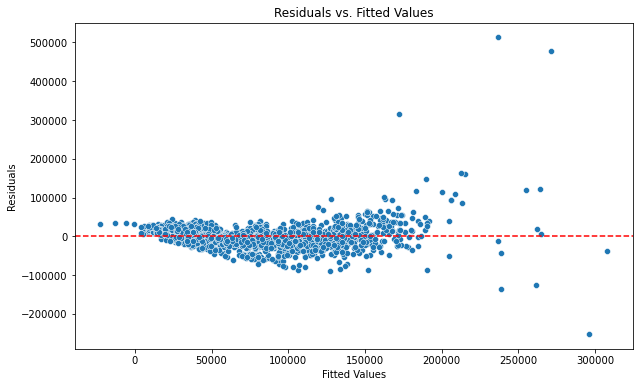

In [97]:
# Assume 'model' is your fitted OLS model
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [102]:
# Calculate the variance of residuals
residual_variance = df2['residuals'].var(ddof=27)

In [103]:
# Add this value as a new column, which will be the same for every row
df2['residual_variance'] = residual_variance

In [105]:
df2['residual_variance'].unique()

array([9.70687629e+08])

In [108]:
# # Group the data
# # This example uses quantiles for simplicity. Adjust the grouping as per your analysis needs.
# num_groups = 2  # Example: 4 groups
# df2['group'] = pd.qcut(df2['gender_Male'], q=num_groups)  # Replace 'X1' with the variable you want to use for grouping

# # Calculate variances of residuals for each group
# group_variances = df2.groupby('group')['residuals'].var()

# print(group_variances)

In [112]:
# Calculate weights (inverse of variance)
# If residual_variance is the same for all observations:
# weights = 1 / residual_variance

# If you have individual variances for each observation (heteroskedastic case):
# weights = 1 / df['individual_variance_column'] 

# Add a constant term to the predictors
X = sm.add_constant(X)  # Replace 'X' with your actual independent variables

# Fit the WLS model
wls_model = sm.WLS(y, X, weights=1./(residuals ** 2)).fit()  # Replace 'y' with your dependent variable

# View the summary of the model
wls_model.summary()

/Users/ifeanyichukwumichaelifiegbu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:     annual_salary_amount_in_usd   R-squared:                       1.000
Model:                                     WLS   Adj. R-squared:                  1.000
Method:                          Least Squares   F-statistic:                 1.971e+05
Date:                         Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                                 14:47:37   Log-Likelihood:                -20712.
No. Observations:                         1920   AIC:                         4.147e+04
Df Residuals:                             1895   BIC:                         4.161e+04
Df Model:                                   24                                         
Covariance Type:                     nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   5903.1503    607.128      9.723      0.000    4712.440    7093.860
job_experience                           864.9058      8.720     99.189      0.000     847.804     882.007
job_pay_level                           1.586e+04     34.602    458.360      0.000    1.58e+04    1.59e+04
gender_Male                             3584.0543     78.344     45.748      0.000    3430.405    3737.703
hourly_or_salary_Salary                  459.5121    297.570      1.544      0.123    -124.087    1043.111
full_or_part_time_Part time            -1.293e+04    910.838    -14.194      0.000   -1.47e+04   -1.11e+04
job_family_group_Catering              -2.488e+04    341.318    -72.884      0.000   -2.55e+04   -2.42e+04
job_family_group_Client Strategy       -1.383e+04    299.790    -46.130      0.000   -1.44e+04   -1.32e+04
job_family_group_Client Techology      -1171.0371    394.540     -2.968      0.003   -1944.815    -397.259
job_family_group_Customer Experience   -1.187e+04    313.961    -37.812      0.000   -1.25e+04   -1.13e+04
job_family_group_Expansion             -1.009e+04    364.803    -27.656      0.000   -1.08e+04   -9373.474
job_family_group_Government Consulting -1.582e+04    514.301    -30.753      0.000   -1.68e+04   -1.48e+04
job_family_group_Graphic Design        -2172.4547    315.551     -6.885      0.000   -2791.318   -1553.592
job_family_group_IPO Strategy          -1.025e+04    893.100    -11.479      0.000    -1.2e+04   -8500.374
job_family_group_Investment             -546.0876    481.535     -1.134      0.257   -1490.483     398.308
job_family_group_Leadership             7.191e+04   4348.072     16.538      0.000    6.34e+04    8.04e+04
job_family_group_Patent Law             1.176e+04    374.583     31.405      0.000     1.1e+04    1.25e+04
job_family_group_Pricing Analytics      1.764e+04    331.693     53.189      0.000     1.7e+04    1.83e+04
job_family_group_R&D                   -5368.0680    492.345    -10.903      0.000   -6333.664   -4402.472
job_family_group_Research              -2.119e+04    410.786    -51.592      0.000    -2.2e+04   -2.04e+04
job_family_group_Strategy              -7140.3897    342.771    -20.831      0.000   -7812.638   -6468.141
job_family_group_Technology Services    2.891e+04    300.634     96.179      0.000    2.83e+04    2.95e+04
job_continent_Africa                   -2.837e+04   2665.335    -10.645      0.000   -3.36e+04   -2.31e+04
job_continent_Americas                  2.295e+04    549.459     41.764      0.000    2.19e+04     2.4e+04
job_continent_Asia                     -2054.7329    576.811     -3.562      0.000   -3185.984 

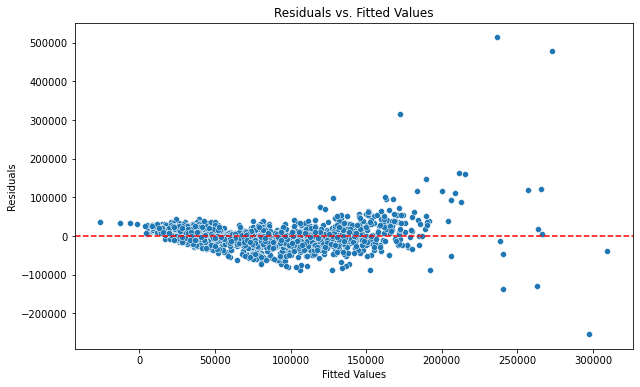

In [113]:
# Assume 'model' is your fitted WLS model
fitted_values = wls_model.fittedvalues
residuals = wls_model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# OLS VS WLS 

In [119]:
print(model.params)


const                                      6971.080489
job_experience                              873.025921
job_pay_level                             15903.449550
gender_Male                                3421.593938
hourly_or_salary_Salary                    -416.763471
full_or_part_time_Part time              -13094.089364
job_family_group_Catering                -24401.970301
job_family_group_Client Strategy         -13667.910515
job_family_group_Client Techology         -1177.317920
job_family_group_Customer Experience     -11638.684942
job_family_group_Expansion                -9907.959399
job_family_group_Government Consulting   -15516.904318
job_family_group_Graphic Design           -2073.070150
job_family_group_IPO Strategy            -10238.702423
job_family_group_Investment                 177.287178
job_family_group_Leadership               70354.053417
job_family_group_Patent Law               11758.678701
job_family_group_Pricing Analytics        17679.359760
job_family

In [120]:
print(wls_model.params)

const                                      5903.150287
job_experience                              864.905795
job_pay_level                             15860.108416
gender_Male                                3584.054258
hourly_or_salary_Salary                     459.512114
full_or_part_time_Part time              -12928.035881
job_family_group_Catering                -24876.443576
job_family_group_Client Strategy         -13829.328192
job_family_group_Client Techology         -1171.037123
job_family_group_Customer Experience     -11871.602170
job_family_group_Expansion               -10088.930594
job_family_group_Government Consulting   -15816.126896
job_family_group_Graphic Design           -2172.454711
job_family_group_IPO Strategy            -10251.936967
job_family_group_Investment                -546.087595
job_family_group_Leadership               71907.826689
job_family_group_Patent Law               11763.885196
job_family_group_Pricing Analytics        17642.435686
job_family

Compare WLS std error to hetero corrected OLS std errors

In [123]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)


In [139]:
# se = np.vstack([[wls_model.bse], [model.bse], [model.HC0_se], [model.HC1_se], [model.HC2_se], [model.HC3_se]])
# se = np.round(se, 4)
# colnames = ["x1", "const"]
# rownames = ["WLS", "OLS", "OLS_HC0", "OLS_HC1", "OLS_HC2", "OLS_HC3"]
# tab1 = SimpleTable(se, colnames, rownames, txt_fmt=default_txt_fmt)
# print(tab1)

In [140]:
# covb = model.cov_params()
# prediction_var = model.mse_resid + (X * np.dot(covb, X.T).T).sum(1)
# prediction_std = np.sqrt(prediction_var)
# tppf = stats.t.ppf(0.975, model.df_resid)
# prstd_ols, iv_l_ols, iv_u_ols = wls_prediction_std(model)

In [141]:
# #draw comparison between wls and ols
# prstd, iv_l, iv_u = wls_prediction_std(wls_model)
# fig, ax = plt.subplots(figsize=(10,10))
# ax.plot(x, y, 'o', label="Data")
# ax.plot(x, y_true, 'b-', label="True")
# # OLS
# ax.plot(x, model.fittedvalues, 'r--')
# ax.plot(x, iv_u_ols, 'r--', label="OLS")
# ax.plot(x, iv_l_ols, 'r--')
# # WLS
# ax.plot(x, wls_model.fittedvalues, 'g--.')
# ax.plot(x, iv_l, 'g--', label="WLS")
# ax.plot(x, iv_u, 'g--')
# ax.legend(loc="best")

In [142]:
# nsample = 50
# x = np.linspace(0, 20, nsample)
# X = np.column_stack((x, (x - 5) ** 2))
# X = sm.add_constant(X)
# beta = [5., 0.5, -0.01]
# sig = 0.5
# w = np.ones(nsample)
# w[nsample * 6//10:]=3
# y_true = np.dot(X, beta)
# e = np.random.normal(size=nsample)
# y = y_true + sig * w * e
# X = X[:, [0, 1]]

ValueError: x and y must be the same size

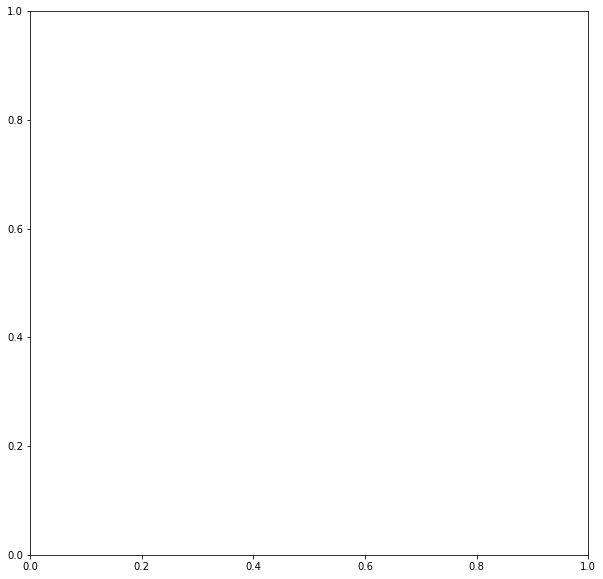

In [143]:
# Predicted values from OLS and WLS models
y_pred_ols = model.fittedvalues
y_pred_wls = wls_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(y, y_pred_ols, color='red', label='OLS Predictions')
plt.scatter(y, y_pred_wls, color='green', label='WLS Predictions')
plt.plot(y, y, color='blue', label='True values')  # Line for perfect predictions
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Comparison of OLS and WLS Predictions')
plt.legend()
plt.show()